In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")


In [9]:
df = pd.read_csv("country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


Step 3: Data Cleaning

In [10]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


In [11]:
# Fill missing daily vaccinations with the mean value (or any other method you prefer)
df['daily_vaccinations'].fillna(df['daily_vaccinations'].mean(), inplace=True)
df['total_vaccinations_per_hundred'].fillna(df['total_vaccinations_per_hundred'].mean(), inplace=True)
df['people_vaccinated_per_hundred'].fillna(df['people_vaccinated_per_hundred'].mean(), inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(df['people_fully_vaccinated_per_hundred'].mean(), inplace=True)
df['daily_vaccinations_per_million'].fillna(df['daily_vaccinations_per_million'].mean(), inplace=True)

# Fill missing vaccination totals with 0 (or mean or another value, as needed)
df['total_vaccinations'].fillna(0, inplace=True)
df['people_vaccinated'].fillna(0, inplace=True)
df['people_fully_vaccinated'].fillna(0, inplace=True)
df['daily_vaccinations_raw'].fillna(0, inplace=True)

# Alternatively, you can drop rows with missing critical data (e.g., 'total_vaccinations')
df.dropna(subset=['total_vaccinations', 'people_vaccinated'], inplace=True)

print(df.isnull().sum())

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


In [12]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check the first few rows again to confirm
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,131305.486075,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [13]:
# Drop unnecessary columns (example)
df.drop(columns=['iso_code', 'source_name', 'source_website'], inplace=True)

# Check the cleaned dataset
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,131305.486075,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0.0,0.0,0.0,0.0,1367.000000,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Step 4: Univariate Analysis (Visualizing Individual Features)

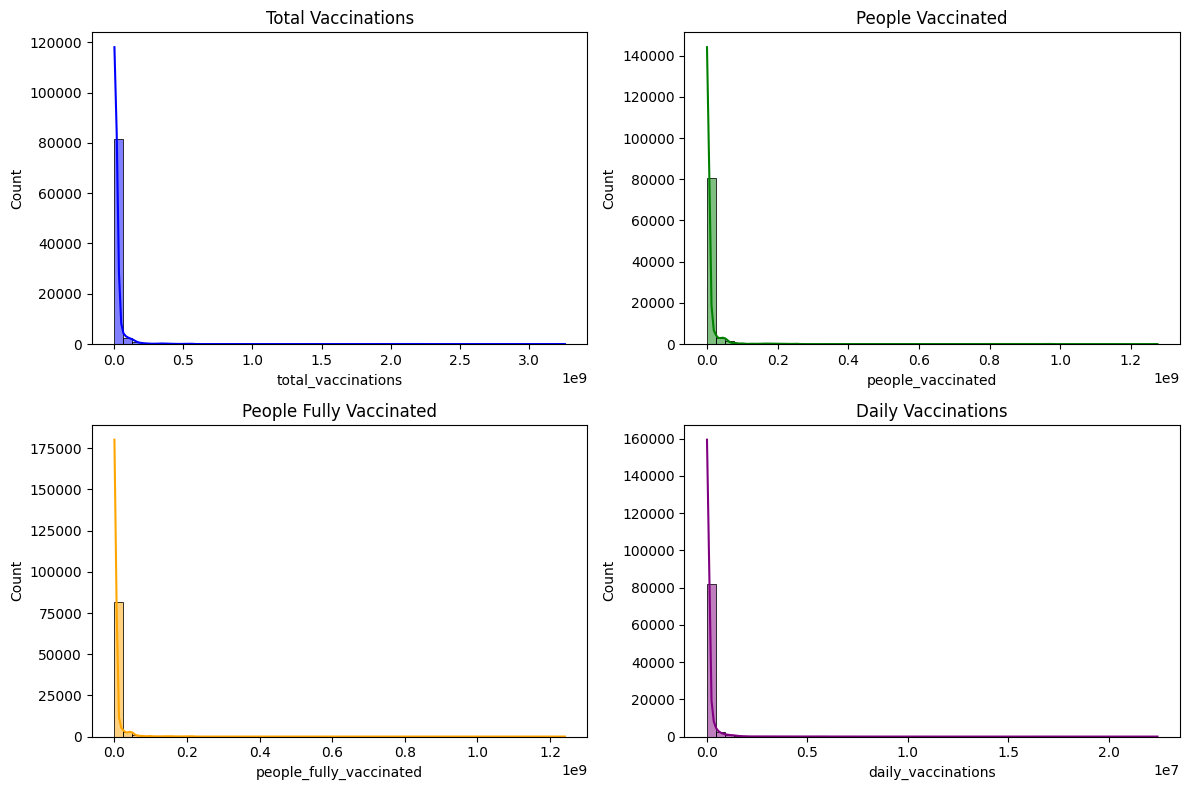

In [14]:
#Numerical Columns Visualizations

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['total_vaccinations'], bins=50, kde=True, color='blue')
plt.title('Total Vaccinations')

plt.subplot(2, 2, 2)
sns.histplot(df['people_vaccinated'], bins=50, kde=True, color='green')
plt.title('People Vaccinated')

plt.subplot(2, 2, 3)
sns.histplot(df['people_fully_vaccinated'], bins=50, kde=True, color='orange')
plt.title('People Fully Vaccinated')

plt.subplot(2, 2, 4)
sns.histplot(df['daily_vaccinations'], bins=50, kde=True, color='purple')
plt.title('Daily Vaccinations')

plt.tight_layout()
plt.show()

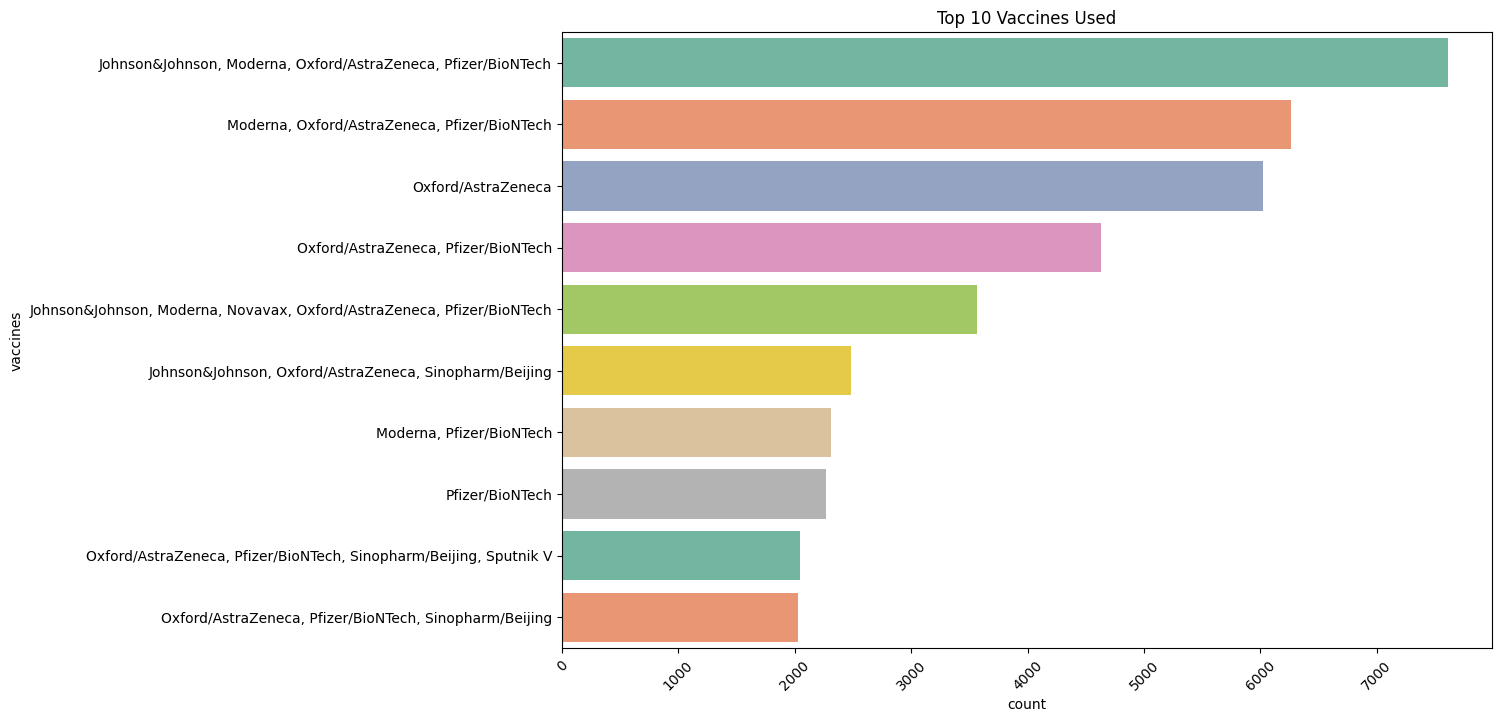

In [12]:
#Categorical Columns Visualization
plt.figure(figsize=(12, 8))

top_vaccines = df['vaccines'].value_counts().nlargest(10).index

sns.countplot(y='vaccines', data=df[df['vaccines'].isin(top_vaccines)], order=top_vaccines, palette='Set2')
plt.title('Top 10 Vaccines Used')

plt.xticks(rotation=45)
plt.show()

Step 5: Bivariate Analysis (Exploring Relationships Between Two Variables)

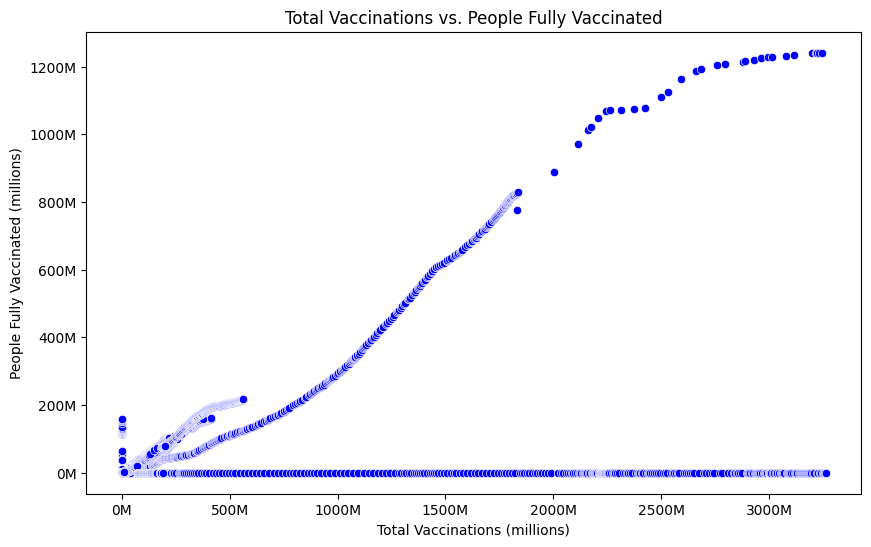

In [17]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_vaccinations', y='people_fully_vaccinated', data=df, color='blue')
plt.title('Total Vaccinations vs. People Fully Vaccinated')
plt.xlabel('Total Vaccinations (millions)')
plt.ylabel('People Fully Vaccinated (millions)')

# Divide by 1 million and label with M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y*1e-6:.0f}M'))

plt.show()


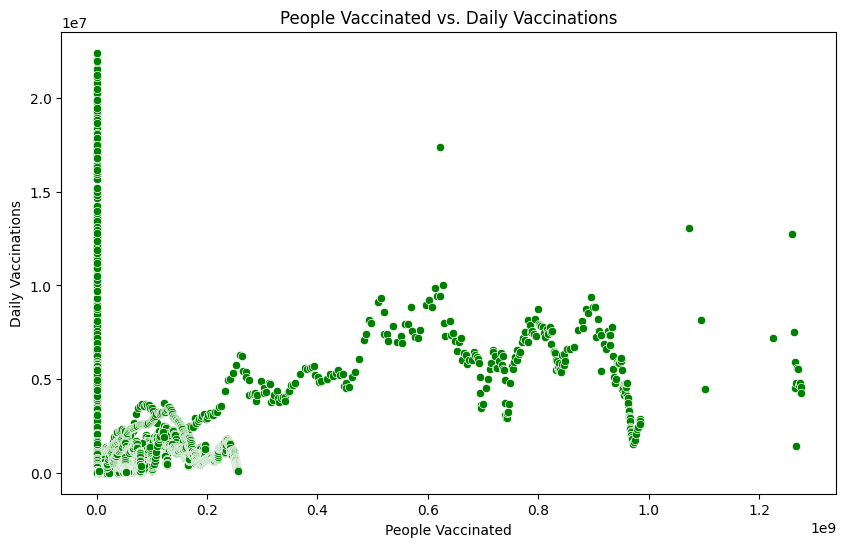

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='people_vaccinated', y='daily_vaccinations', data=df, color='green')
plt.title('People Vaccinated vs. Daily Vaccinations')
plt.xlabel('People Vaccinated')
plt.ylabel('Daily Vaccinations')
plt.show()


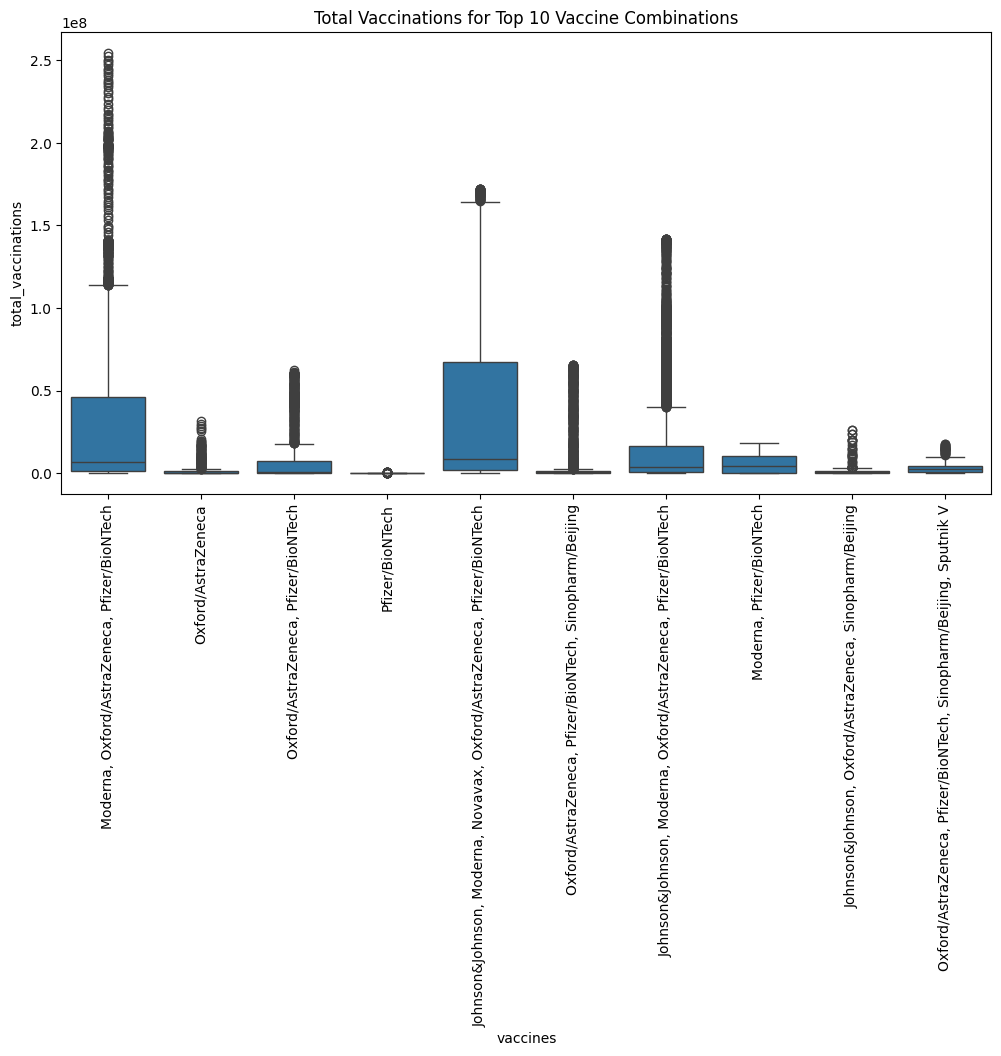

In [9]:
# Top 10 most used vaccine combinations
top_vaccine_combinations = df['vaccines'].value_counts().nlargest(10).index

# Filter the DataFrame
df_top_vaccines = df[df['vaccines'].isin(top_vaccine_combinations)]

# Boxplot for Top 10 vaccine combinations
plt.figure(figsize=(12, 6))
sns.boxplot(x='vaccines', y='total_vaccinations', data=df_top_vaccines)
plt.xticks(rotation=90)
plt.title('Total Vaccinations for Top 10 Vaccine Combinations')
plt.show()


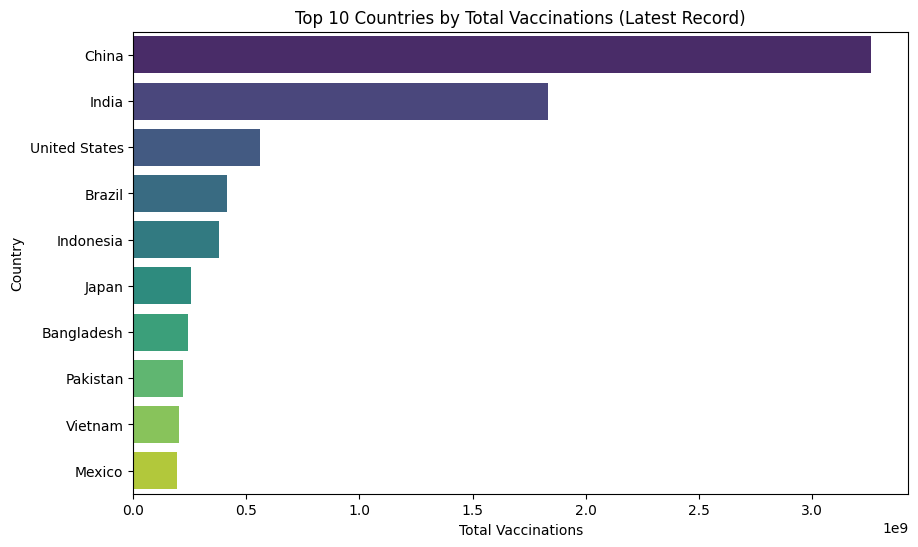

In [13]:
# Get the latest vaccination record for each country
latest_df = df.sort_values('date').groupby('country').tail(1)

# Plot top 10 countries with highest total vaccinations
top_countries = latest_df.sort_values('total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_vaccinations', y='country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total Vaccinations (Latest Record)')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.show()


 Step 6: Time Series Analysis

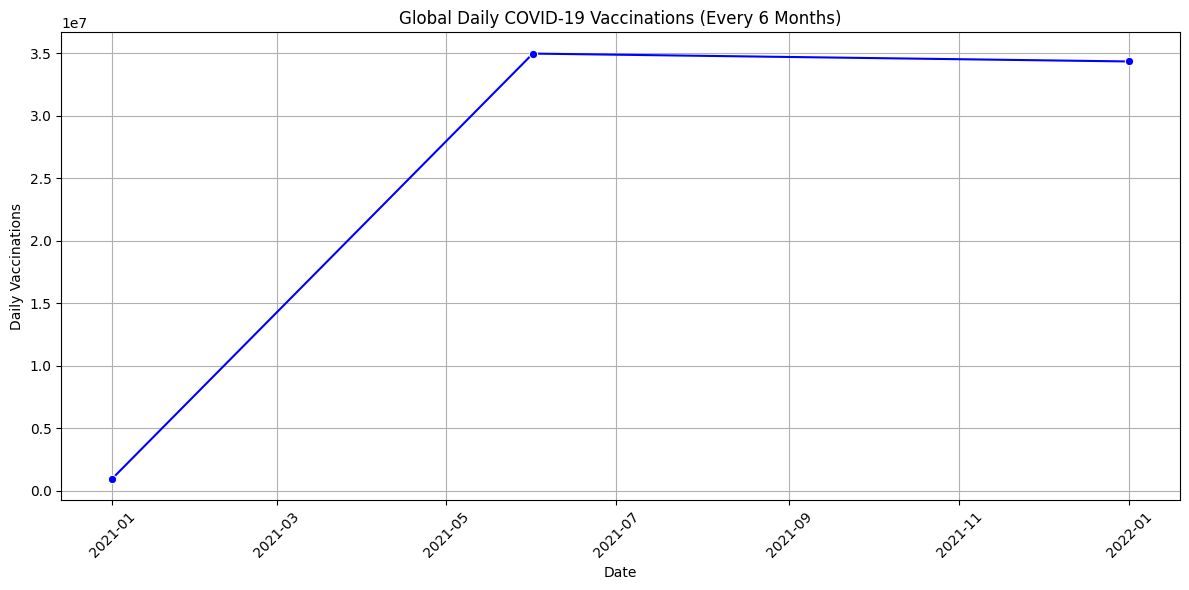

In [21]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Group by date to get total global daily vaccinations
global_vacc = df.groupby('date')['daily_vaccinations'].sum().reset_index()

# Filter: Keep only rows where month is Jan or Jul and day is 1st
global_vacc_6mo = global_vacc[
    (global_vacc['date'].dt.month.isin([1, 6])) & (global_vacc['date'].dt.day == 1)
]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='daily_vaccinations', data=global_vacc_6mo, marker='o', color='blue')
plt.title('Global Daily COVID-19 Vaccinations (Every 6 Months)')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


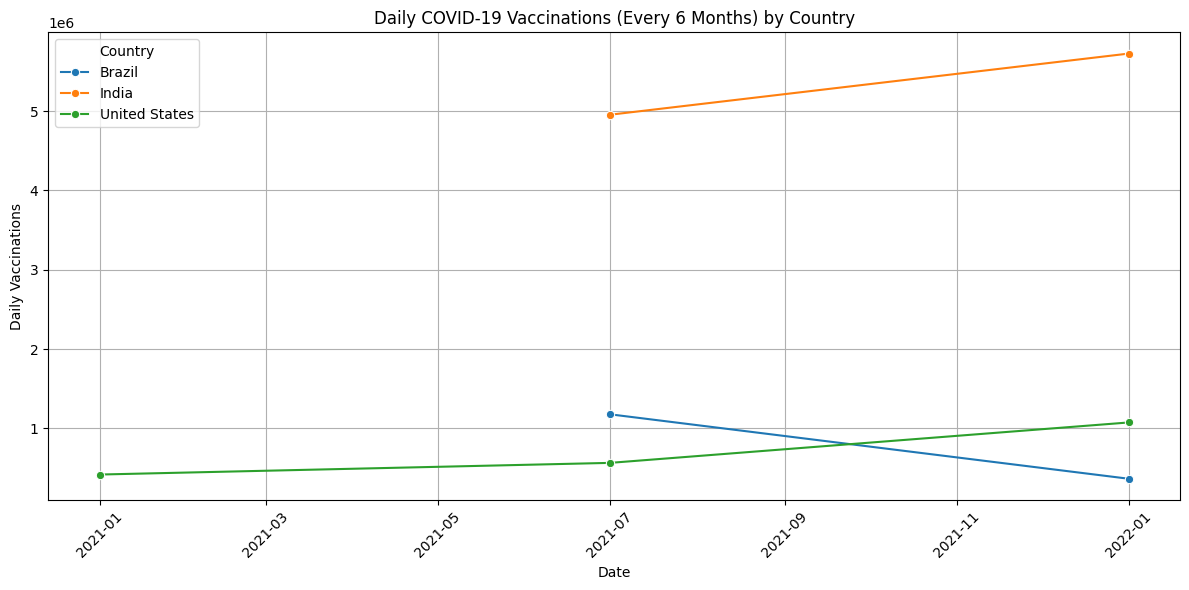

In [22]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# List of countries to compare
countries = ['India', 'United States', 'Brazil']

# Filter for selected countries
df_countries = df[df['country'].isin(countries)]

# Filter: Keep only rows for Jan 1st and Jul 1st
df_countries_6mo = df_countries[
    (df_countries['date'].dt.month.isin([1, 7])) & (df_countries['date'].dt.day == 1)
]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries_6mo, x='date', y='daily_vaccinations', hue='country', marker='o')
plt.title('Daily COVID-19 Vaccinations (Every 6 Months) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


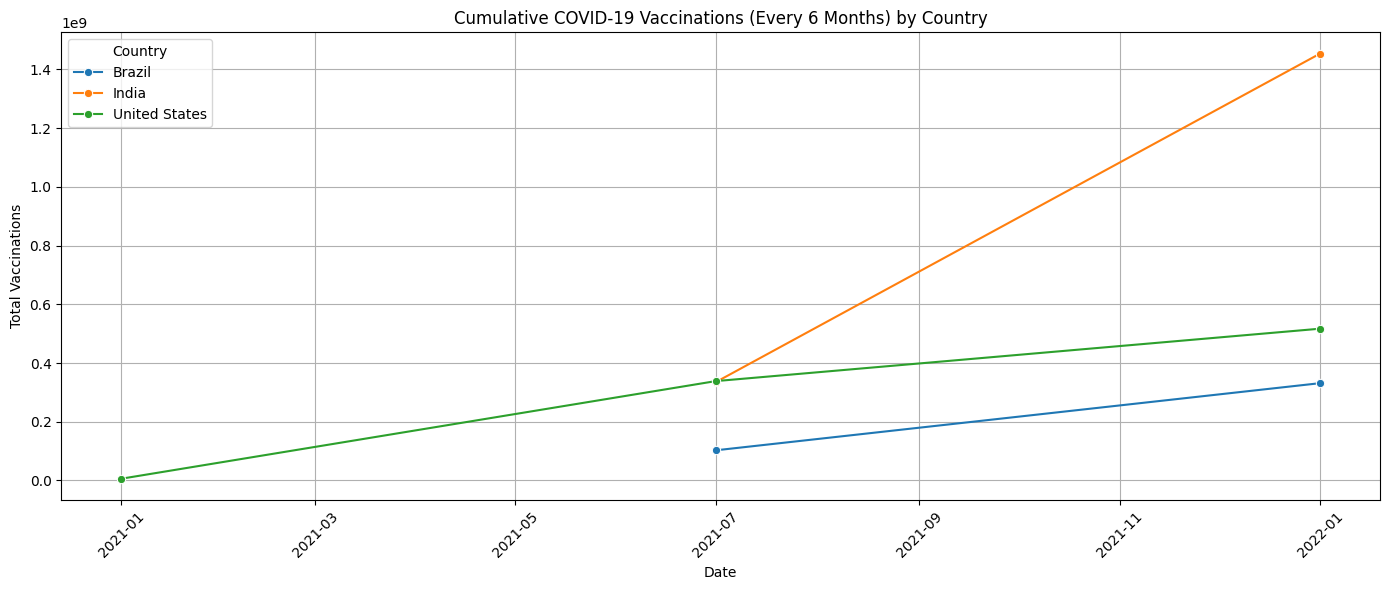

In [24]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
countries = ['India', 'United States', 'Brazil']
df_countries = df[df['country'].isin(countries)]

# Keep only Jan 1st and Jul 1st of any year
df_countries_6mo = df_countries[
    ((df_countries['date'].dt.month == 1) | (df_countries['date'].dt.month == 7)) &
    (df_countries['date'].dt.day == 1)
]

# Plot cumulative vaccinations
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_countries_6mo, x='date', y='total_vaccinations', hue='country', marker='o')
plt.title('Cumulative COVID-19 Vaccinations (Every 6 Months) by Country')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Split vaccines string into lists
df['vaccines_list'] = df['vaccines'].apply(lambda x: x.split(', '))

# Explode list so each vaccine is one row per country-date
vaccine_expanded = df.explode('vaccines_list')

# Get unique countries per vaccine
vaccine_country_counts = vaccine_expanded.groupby('vaccines_list')['country'].nunique().reset_index()

# Rename columns for clarity
vaccine_df = vaccine_country_counts.rename(columns={
    'vaccines_list': 'Vaccine',
    'country': 'Number of Countries'
}).sort_values(by='Number of Countries', ascending=False)

vaccine_df.head()  # Check the data


,Vaccine,Number of Countries
10,Oxford/AstraZeneca,183
11,Pfizer/BioNTech,158
14,Sinopharm/Beijing,90
8,Moderna,90
6,Johnson&Johnson,89


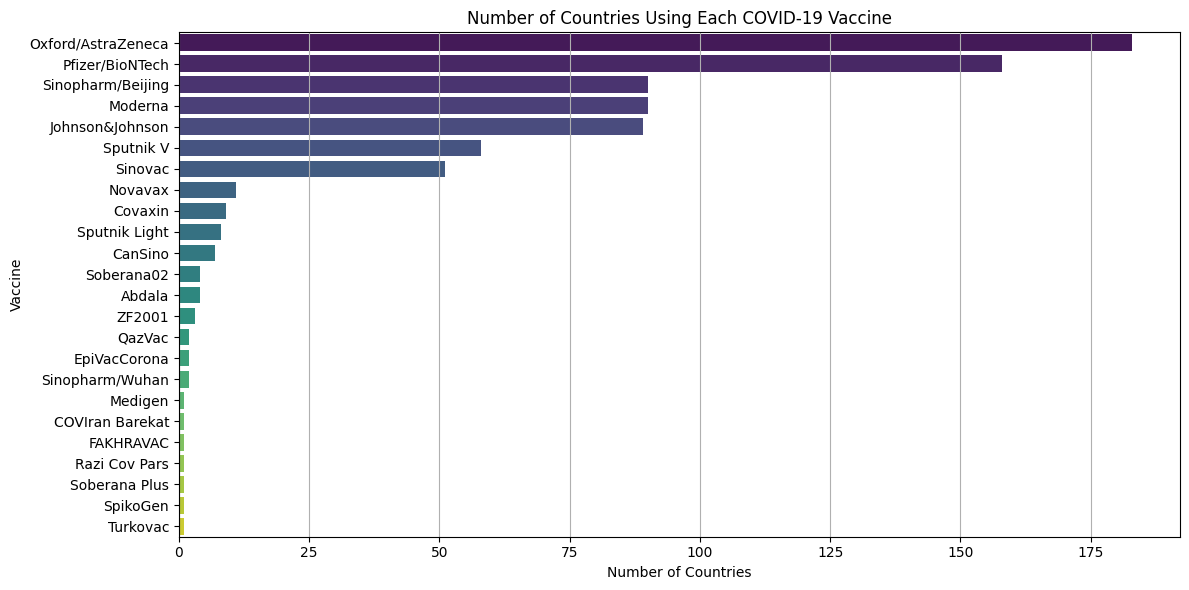

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vaccine_df, x='Number of Countries', y='Vaccine', palette='viridis')
plt.title('Number of Countries Using Each COVID-19 Vaccine')
plt.xlabel('Number of Countries')
plt.ylabel('Vaccine')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [19]:
# Sort by date to get the latest record
latest_df = df.sort_values('date').groupby('country').tail(1)

# Sort by total vaccinations
top_vaccinated = latest_df.sort_values(by='total_vaccinations', ascending=False).head(10)


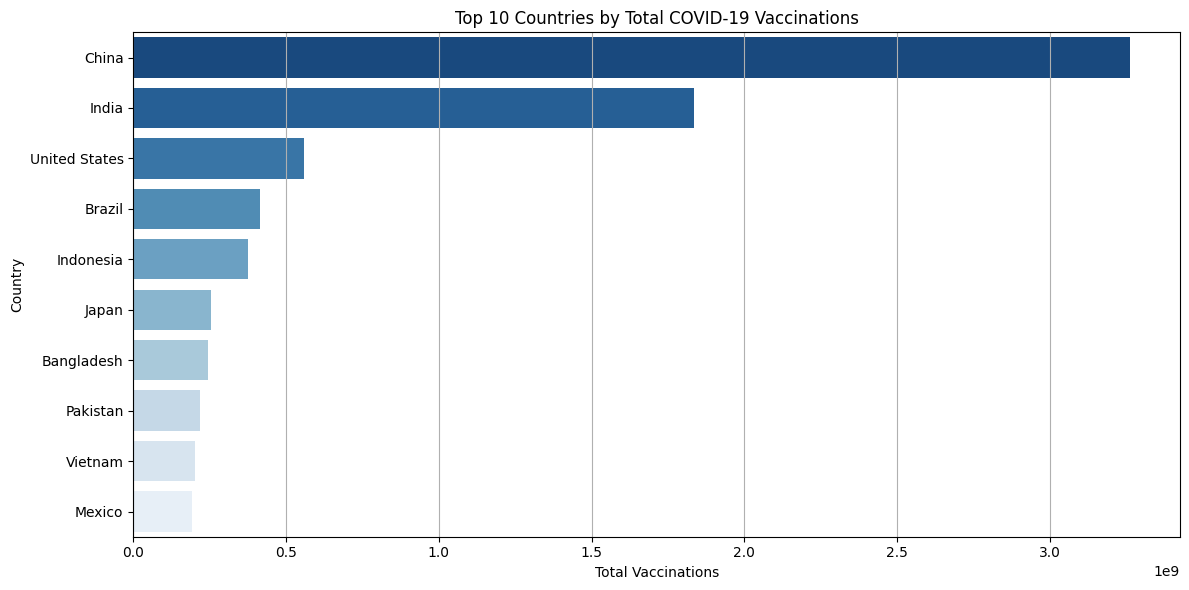

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vaccinated, x='total_vaccinations', y='country', palette='Blues_r')
plt.title('Top 10 Countries by Total COVID-19 Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


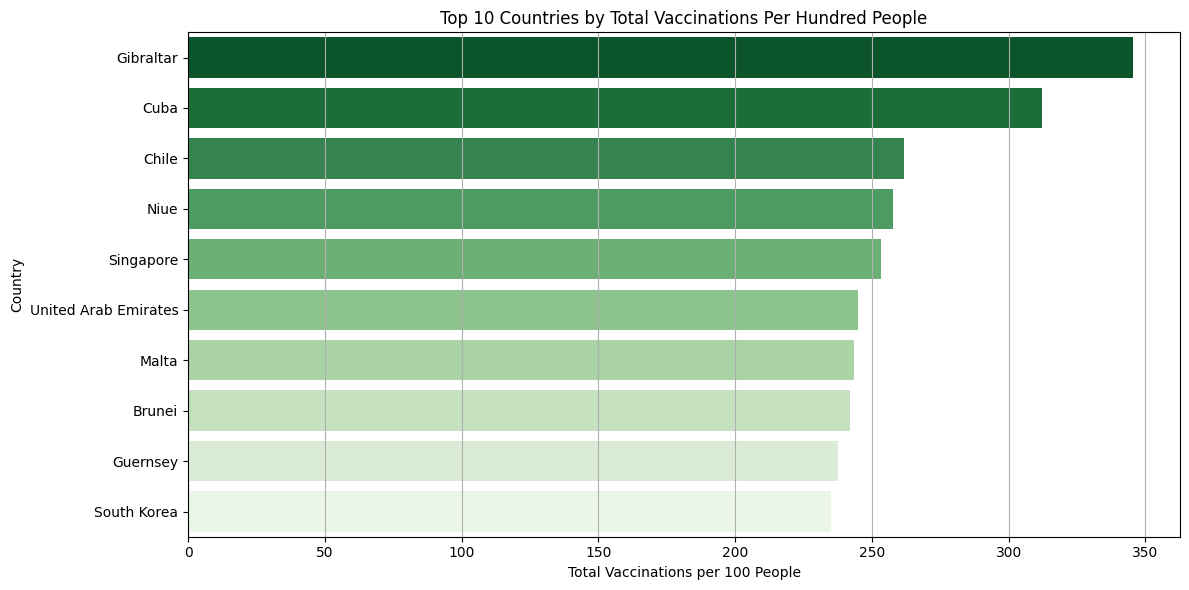

In [16]:
top_per_hundred = latest_df.sort_values(by='total_vaccinations_per_hundred', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_per_hundred, x='total_vaccinations_per_hundred', y='country', palette='Greens_r')
plt.title('Top 10 Countries by Total Vaccinations Per Hundred People')
plt.xlabel('Total Vaccinations per 100 People')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


In [21]:
vaccine_usage = df.groupby('country')['vaccines'].last().value_counts().reset_index()
vaccine_usage.columns = ['Vaccine Combination', 'Number of Countries']


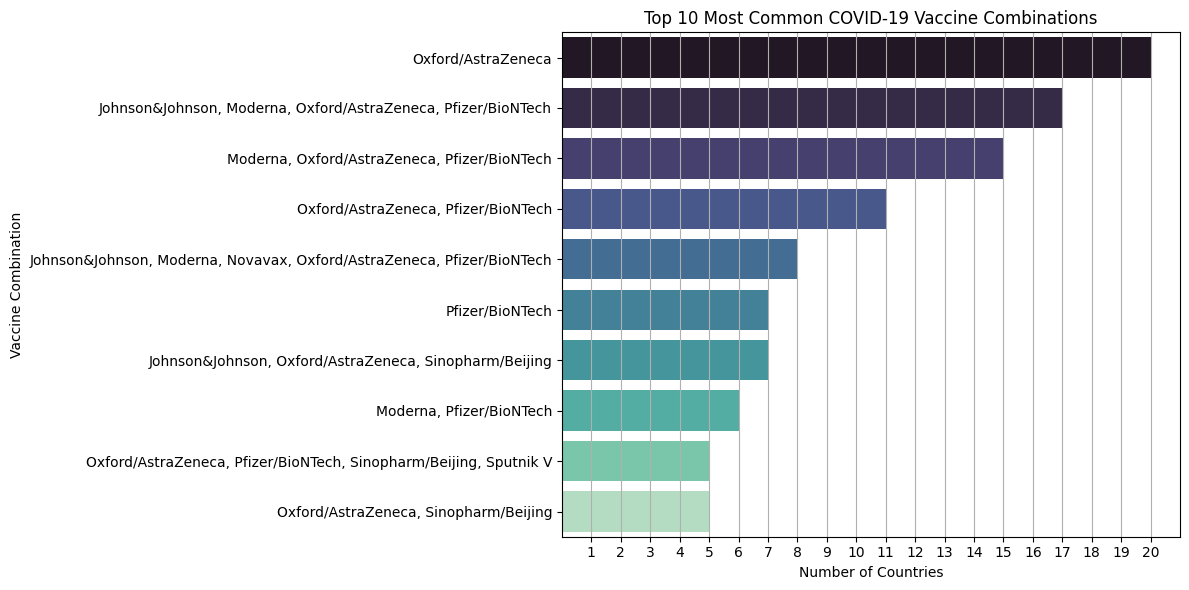

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vaccine_usage.head(10), x='Number of Countries', y='Vaccine Combination', palette='mako')
plt.title('Top 10 Most Common COVID-19 Vaccine Combinations')
plt.xlabel('Number of Countries')
plt.ylabel('Vaccine Combination')
plt.grid(True, axis='x')

# Set x-axis ticks to whole numbers
max_val = vaccine_usage['Number of Countries'].max()
plt.xticks(ticks=range(1, max_val + 1, 1))  # Adjust the step (e.g., 1 or 2) as needed

plt.tight_layout()
plt.show()


In [24]:
# You can expand this dictionary
continent_map = {
    'India': 'Asia',
    'United States': 'North America',
    'Brazil': 'South America',
    'Germany': 'Europe',
    'South Africa': 'Africa',
    'Australia': 'Oceania',
    # Add more as needed
}

df['continent'] = df['country'].map(continent_map)


In [25]:
# Use latest record for each country
latest_df = df.sort_values('date').groupby('country').tail(1)

# Drop countries with missing continent info
latest_df = latest_df.dropna(subset=['continent'])

# Group by continent
continent_vacc = latest_df.groupby('continent')['total_vaccinations'].sum().reset_index()


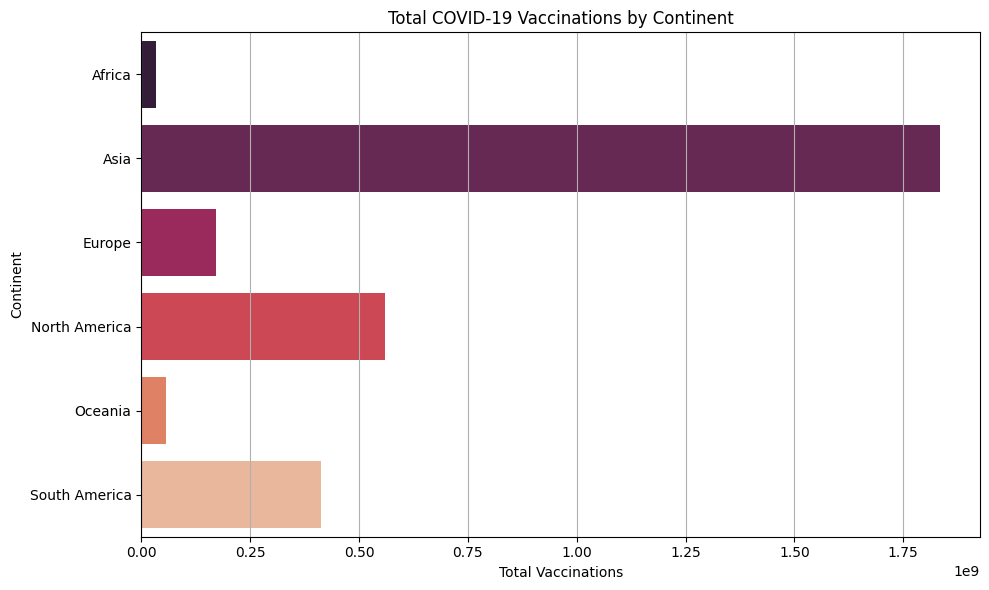

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_vacc, x='total_vaccinations', y='continent', palette='rocket')
plt.title('Total COVID-19 Vaccinations by Continent')
plt.xlabel('Total Vaccinations')
plt.ylabel('Continent')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


In [27]:
continent_coverage = latest_df.groupby('continent')[
    'total_vaccinations_per_hundred'
].mean().reset_index().sort_values(by='total_vaccinations_per_hundred', ascending=False)


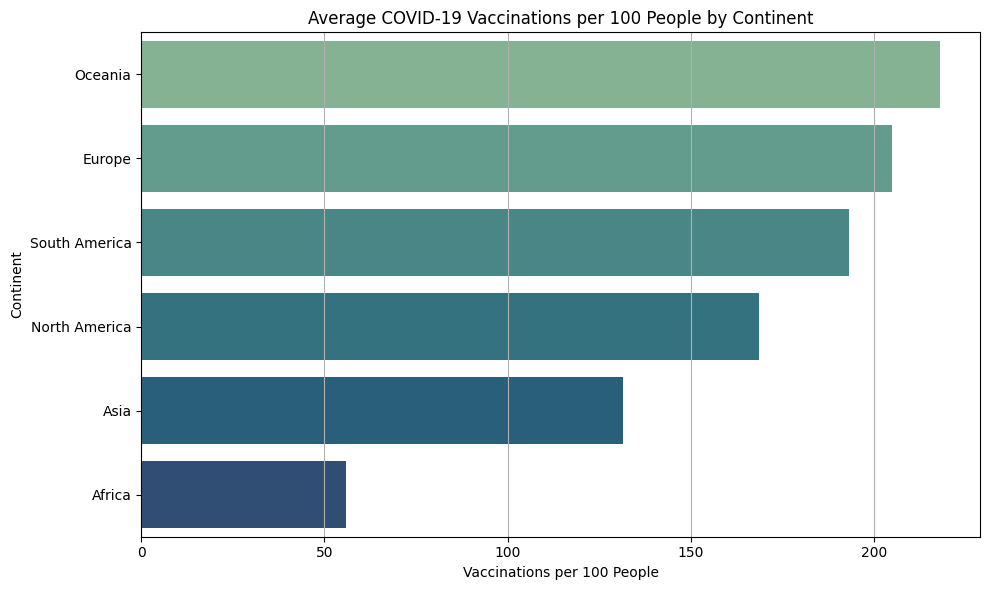

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_coverage, x='total_vaccinations_per_hundred', y='continent', palette='crest')
plt.title('Average COVID-19 Vaccinations per 100 People by Continent')
plt.xlabel('Vaccinations per 100 People')
plt.ylabel('Continent')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


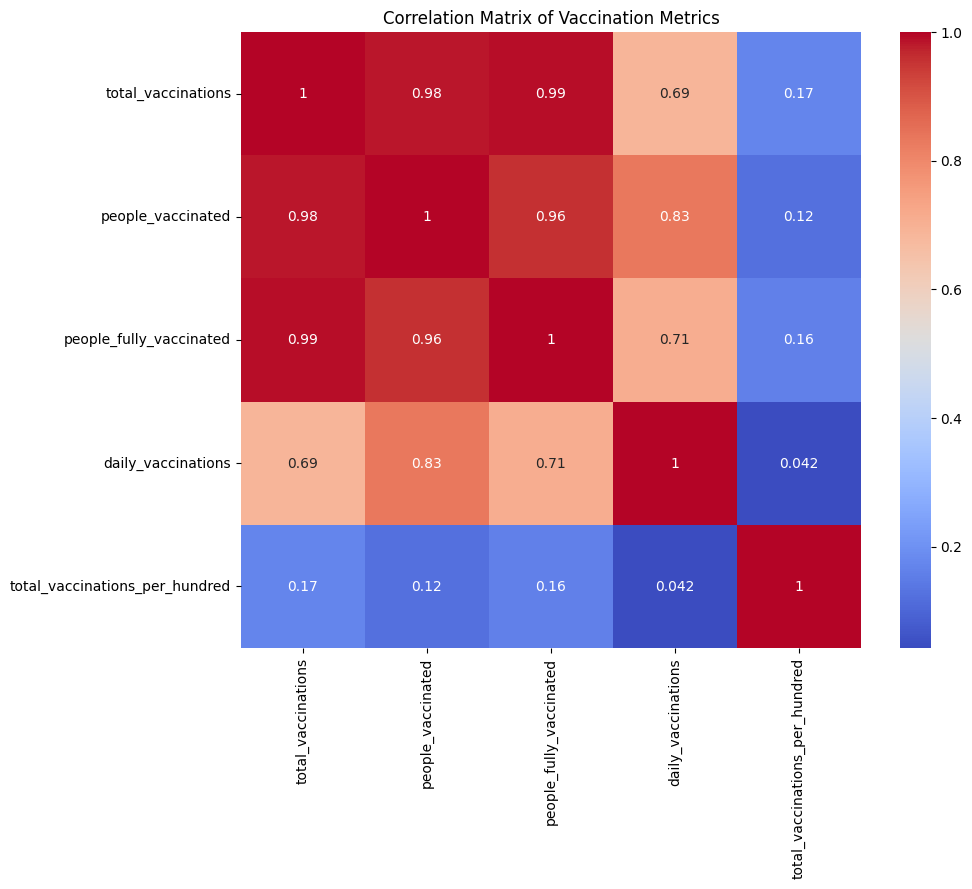

In [49]:
plt.figure(figsize=(10, 8))
corr = df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
           'daily_vaccinations', 'total_vaccinations_per_hundred']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vaccination Metrics')
plt.show()


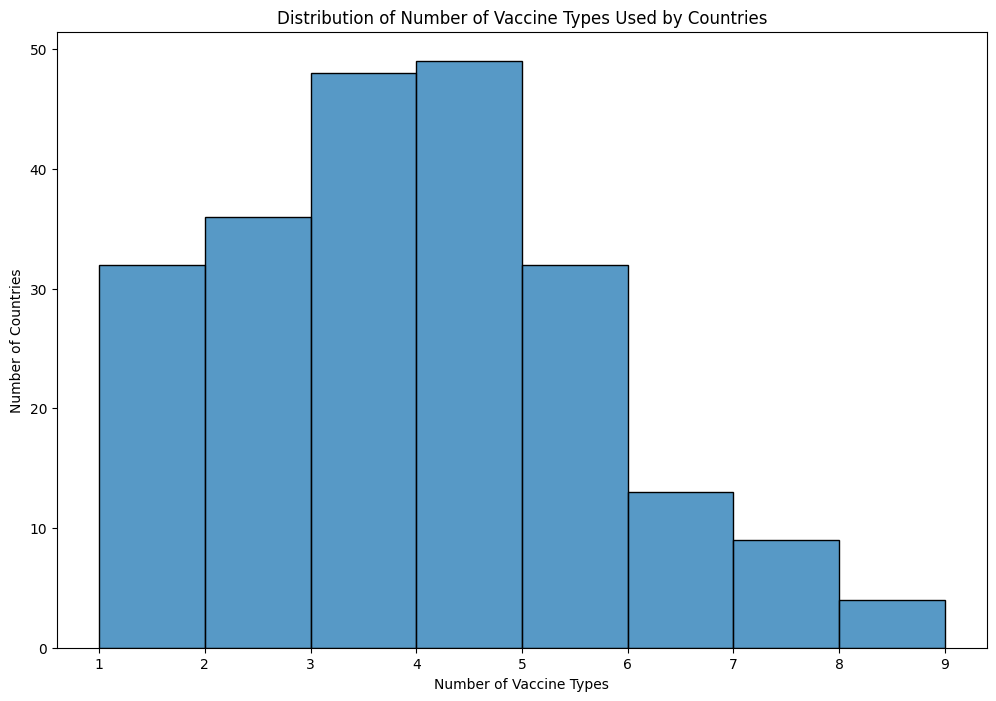

In [50]:
df['vaccines_list'] = df['vaccines'].apply(lambda x: x.split(', '))
vaccine_diversity = df.groupby('country')['vaccines_list'].apply(lambda x: len(set(sum(x, [])))).reset_index()
vaccine_diversity.columns = ['country', 'vaccine_count']

plt.figure(figsize=(12, 8))
sns.histplot(vaccine_diversity['vaccine_count'], bins=range(1,10), kde=False)
plt.title('Distribution of Number of Vaccine Types Used by Countries')
plt.xlabel('Number of Vaccine Types')
plt.ylabel('Number of Countries')
plt.show()
